# Linear Regression Modeling to Predict Systolic Blood Pressure

## Import appropriate libraries 

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from scipy import stats

## Import excel dataset using Pandas


In [6]:
df=pd.read_excel (r'/Users/kailei/Downloads/SBP.xls')

In [7]:
print(df)
df.dtypes

    PERSON  SBP   QUET  AGE  SMK
0        1  135  2.876   45    0
1        2  122  3.251   41    0
2        3  130  3.100   49    0
3        4  148  3.768   52    0
4        5  146  2.979   54    1
5        6  129  2.790   47    1
6        7  162  3.668   60    1
7        8  160  3.612   48    1
8        9  144  2.368   44    1
9       10  180  4.637   64    1
10      11  166  3.877   59    1
11      12  138  4.032   51    1
12      13  152  4.116   64    0
13      14  138  3.673   56    0
14      15  140  3.562   54    1
15      16  134  2.998   50    1
16      17  145  3.360   49    1
17      18  142  3.024   46    1
18      19  135  3.171   57    0
19      20  142  3.401   56    0
20      21  150  3.628   56    1
21      22  144  3.751   58    0
22      23  137  3.296   53    0
23      24  132  3.210   50    0
24      25  149  3.301   54    1
25      26  132  3.017   48    1
26      27  120  2.789   43    0
27      28  126  2.956   43    1
28      29  161  3.800   63    0
29      30

PERSON      int64
SBP         int64
QUET      float64
AGE         int64
SMK         int64
dtype: object

This is a dataset that contains 32 patients' information such as their blood pressure (SBP), body size (QUET), age (AGE) and smoking status (SMK). Noted that smoking is being imported in as an integer. We need to convert it to a categorical variable. (The PERSON column is the ID column.)

## Get summary statistics for continuous variables 

In [8]:
# first categorize SMK variable 
df["SMK"] = df["SMK"].astype('category')

df.dtypes

include =['object', 'float', 'int'] 
desc = df.describe(include = include) 
desc

,PERSON,SBP,QUET,AGE
count,32.000000,32.000000,32.000000,32.000000
mean,16.500000,144.531250,3.441094,53.250000
std,9.380832,14.397545,0.497078,6.956083
min,1.000000,120.000000,2.368000,41.000000
25%,8.750000,134.750000,3.022250,48.000000
50%,16.500000,143.000000,3.380500,53.500000
75%,24.250000,152.000000,3.776000,58.250000
max,32.000000,180.000000,4.637000,65.000000


* The patients' age range from 41 years old to 65 years old. The average age is 16.5 ($\pm$ 9.4) years old. The average systolic blood pressure is 144.53 ($\pm$ 14.4) mmHg with the highest blood pressure being 180 mmHg.

## Get sumamry statistics for categorical variables 

In [9]:
descc=df.describe(exclude=include)
descc

,SMK
count,32
unique,2
top,1
freq,17


* 17 patients are smokers and 15 patients are non-smokers.

## Data exploration /Visualization 

* For continuous variables, we are checking shape of distirbution and whether the data is skewed.

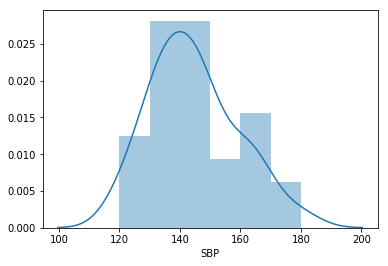

In [10]:
sns.distplot(df['SBP'])

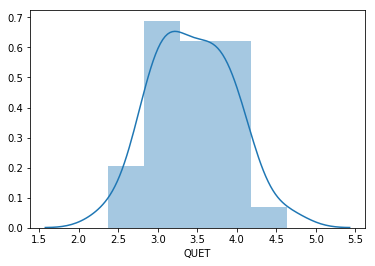

In [11]:
sns.distplot(df['QUET'])

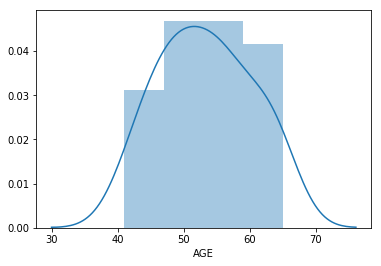

In [12]:
sns.distplot(df['AGE'])

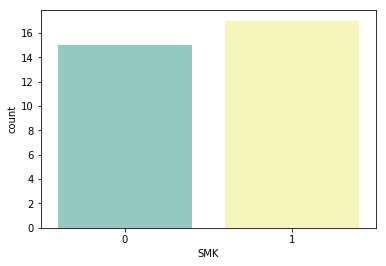

In [13]:
ax = sns.countplot(x="SMK", data=df, palette="Set3")

## Correlation between variables 

In [14]:
df[df.columns[~df.columns.isin(['PERSON'])]].corr()

,SBP,QUET,AGE
SBP,1.000000,0.742004,0.775204
QUET,0.742004,1.000000,0.802751
AGE,0.775204,0.802751,1.000000


## Training Linear Regression Model

In [15]:
X=df[['QUET','AGE', 'SMK']]
y=df['SBP']

## Train Test Split 
* 40% of the data is the test data and the rest is the training set.

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

* Fit the linear regrewssion on the training data

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Predictions from Model

In [19]:
predictions=lm.predict(X_test)

## Visualise the prediction

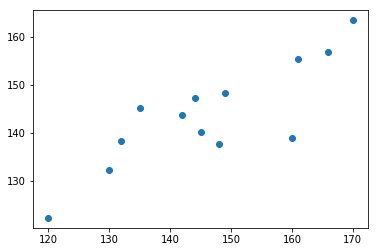

In [20]:
plt.scatter(y_test, predictions)

## Estimated Coefficients 

In [21]:
coeff_df=pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
QUET,0.845771
AGE,1.611693
SMK,7.789661


## Observed vs. Predicted 

In [22]:
pd.DataFrame({'Observed': y_test, 'Predicted': predictions})

,Observed,Predicted
7,160,138.866729
29,170,163.481925
28,161,155.411468
25,132,138.363495
19,142,143.792154
21,144,147.311560
2,130,132.255726
26,120,122.322533
24,149,148.273852
16,145,140.265288


## Regression Evaluation 

In [23]:
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, predictions))

Mean Squared Error: 69.53


In [24]:
print('Variance score: %.2f' % r2_score(y_test, predictions))

Variance score: 0.66


* 66% of the variation in systolic blood pressure can be explained by one's body size, age and smoking status. 